<a href="https://colab.research.google.com/github/bingsen-wang/EE-Fundamentals/blob/main/RMS_of_PulseRipple_anim.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1><b>RMS of Pulse Ripple</h1></b>

Dr. Bingsen Wang

12/2/2024
</center>

#Python Code


0
0
100
200
300
400
0


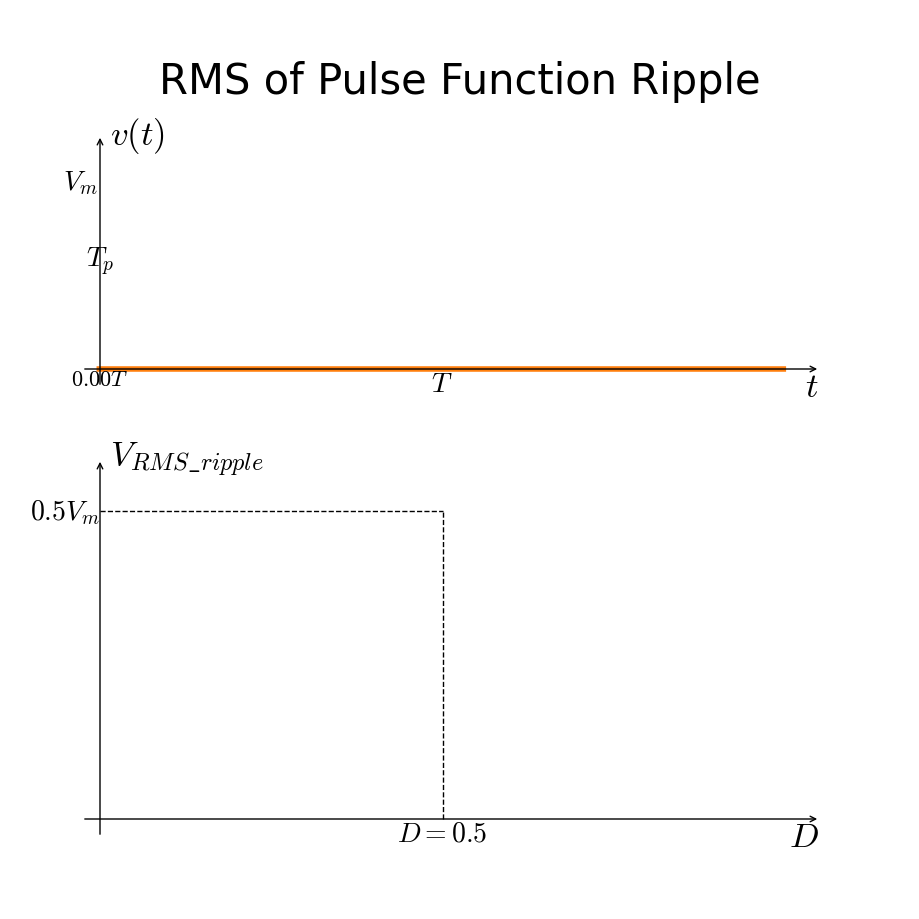

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import animation,pyplot,cm
plt.rcParams.update({'font.family':"sans serif",'mathtext.fontset':'cm'})

def rms_ripple(d):
  d=np.array(d)
  return np.sqrt(d*(1-d))
Nf =500
D = np.linspace(0,1,Nf)
t=np.linspace(-.001,1-.001,2000)
clst = list(cm.tab10.colors) #colors of lines
fig = plt.figure(figsize=([9,9]))
ax= fig.add_axes([0,0,1,1],xlim=[0,1],ylim=[0,1])
ax.axis('off')
x0,y0=[.1,.1],[.6,.1]
xn,xm,yn,ym=[x0[0]-.02,x0[1]-.02],[.9,.9],[y0[0]-.02,y0[1]-.02],[.86,.5]
for i in range(2):
  [ax.annotate('',[(xm[i],y0[i]),(x0[i],ym[i])][k],[(xn[i],y0[i]),(x0[i],yn[i])][k],arrowprops=dict(arrowstyle='->')) for k in range(2)]
  [ax.text([x0[i],xm[i]][k],[ym[i],y0[i]][k],[['$\ v(t)$','$\ V_{RMS\_ripple}$'][i],['$t$ ','$D$ '][i]][k], size=25,
         va=['center','top'][k],ha=['left','right'][k]) for k in range(2)]
lines = [ax.plot([],[],lw=4,c=clst[1-k])[0] for k in range(2)]
ax.text(x0[0],y0[0]+(ym[0]-y0[0])*.8,'$V_m$ ',size=20,ha='right',va='center')
ax.text(x0[0]+(xm[0]-x0[0])*.95*.5,y0[0],'$T$',size=20,ha='center',va='top')
an1=ax.annotate('',(x0[0],y0[0]+(ym[0]-y0[0])*.4),(x0[0],y0[0]),arrowprops=dict(arrowstyle='<->'))
txt_Tp=ax.text(x0[0],y0[0],'$T_p$',size=20,ha='center')
txt_DT=ax.text(x0[0],y0[0],'',size=16,ha='center',va='top')
ax.text(.5,.92,r'RMS of Pulse Function Ripple',size=30,ha='center',va='center')

def animate(i):
  if i%100==0:print(i)
  vt = np.heaviside(D[i]-(t%.5)*2,1)
  ripple = rms_ripple(D[:i+1])
  lines[0].set_data(x0[0]+t*(xm[0]-x0[0])*.95,y0[0]+vt*(ym[0]-y0[0])*.8)
  lines[1].set_data(x0[1]+D[:i+1]*(xm[1]-x0[1])*.95,y0[1]+ripple*(ym[1]-y0[1])*.95*1.8)
  txt_Tp.set_position((x0[0]+(xm[0]-x0[0])*.95*.5*D[i]/2,y0[0]+(ym[0]-y0[0])*.4+.01))
  an1.set_position((x0[0]+(xm[0]-x0[0])*.95*D[i]/2,y0[0]+(ym[0]-y0[0])*.4))
  txt_DT.set_position((x0[0]+(xm[0]-x0[0])*.95*D[i]/2,y0[0]))
  txt_DT.set_text(f'${D[i]:.2f}T$')
  if i==Nf//2:
    ax.plot([x0[1]+D[i]*(xm[1]-x0[1])*.95,x0[1]+D[i]*(xm[1]-x0[1])*.95],
     [y0[1],y0[1]+ripple[-1]*(ym[1]-y0[1])*.95*1.8],'--k',lw=1)
    ax.plot([x0[1],x0[1]+D[i]*(xm[1]-x0[1])*.95],[y0[1]+ripple[-1]*(ym[1]-y0[1])*.95*1.8,y0[1]+ripple[-1]*(ym[1]-y0[1])*.95*1.8],'--k',lw=1)
    ax.text(x0[1],y0[1]+ripple[-1]*(ym[1]-y0[1])*.95*1.8,'$0.5V_m$',size=20,ha='right',va='center')
    ax.text(x0[1]+D[i]*(xm[1]-x0[1])*.95,y0[1],'$D=0.5$',size=20,ha='center',va='top')
  return
anim = animation.FuncAnimation(fig, animate, frames=Nf, interval=150)
anim.save("rms_PulseFunction.mp4", writer=animation.FFMpegWriter(fps=50), dpi=200)